<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/DimensionalReduction_pII_LLE_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continuação de *Dimensional Reduction*

Além de PCA, tem outras formas de reduzir dimensionalidade, o que pode permitir por exemplo "clusterizar" dados com múltiples variáveis (features) em um "mapa" em 2D.

Os seguintes exemplos foram tomados do livro texto Hands-on Machine Learning... (A. Geron)

## Locally linear embedding
Tenta reduzir a dimensionalidade ao relacionar um ponto com um numero fixo de pontos vizinhos. Assim não precisa de projeções e consegue "desenrolar" o rocambole.

(-12, 15)

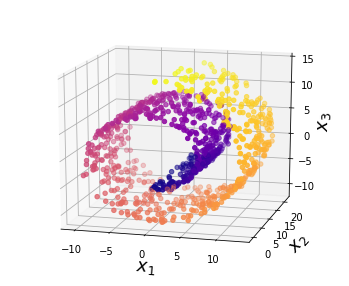

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import numpy as np
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap="plasma")
ax.view_init(15, -75)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


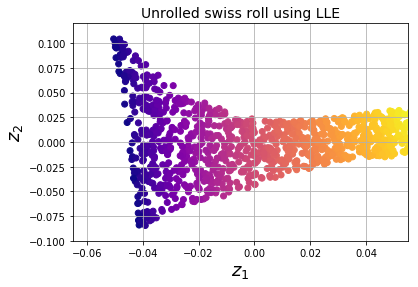

In [2]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap="plasma")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

O **LLE** reconstroi cada instância $x_i$ como uma combinação linear dos $k$ vizinhos mais cercanos, nesse caso $k=10$, e acha os pesos $w_{ij}$ para que a métrica seguinte seja mínima:

$ \displaystyle S = \left\| x_i - \sum_{j=1}^{m}{ w_{ij} x_{j} } \right\|^2$

Onde $j\neq i$ e $w_{ij}=0$ para os pontos que não pertencem aos  $k$ vizinhos mais próximos. 

* Como varia essa reconstrução se mudarmos o parámetro $k$? (```n_neighbors```)

* Acesse o atributo ```lle.reconstruction_error_```   para ver como este varia com o numero de vizinhos considerado. 

In [3]:
lle.reconstruction_error_

5.603948932695915e-08

Para a visualização em menor dimensão, o seguinte paso é escolher um espaço de menor dimensão ($d < n$) que "preserve" essas relações. Então no novo espaço os dados estão representados por $z_i$ onde:

$ \displaystyle S = \left\| z_i - \sum_{j=1}^{m}{ \hat{w}_{ij} z_{j} } \right\|^2$

agora mantendo os pesos $\hat{w}_{ij}$ fixos no valor achado no paso anterior para optimizar os valores de $z_i$

## MDS, Isomap e t-SNE

Em scikit-learn tem outros métodos implementados. 

 * **MDS** : Multi-dimensional Scaling reduz a dimensionalidade tentando preservar as distâncias entre instâncias.
 * **Isomap**: cria um "grafo" entre a instância e seus vizinhos e tenta preservar a distancia *geodêsica* entre instâncias (número de nós no caminho mais curto).
 * **t-SNE**: mais usado para visualização. Tenta manter instâncias *similares* perto.  https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw

In [0]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)


In [0]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)


In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)


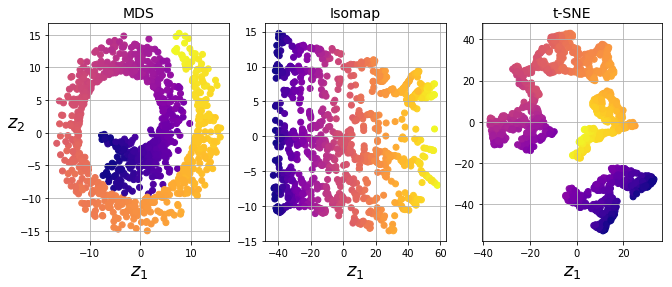

In [7]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap="plasma")
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

## Exercicio 10 do livro

Usar o método t-SNE do scikit-learn para reduzir o dataset  MNIST a duas dimensões e graficar o resultado usando 10 cores.
Vamos usar só um subconjunto de 10k imagens, pois pode demorar demais.

In [0]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [0]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [10]:
import time


tsne = TSNE(n_components=2, random_state=42)

t0=time.time()
X_reduced_tsne = tsne.fit_transform(X)
t1 = time.time()
print("t-SNE demorou {:.1f}s.".format(t1 - t0))

t-SNE demorou 267.0s.


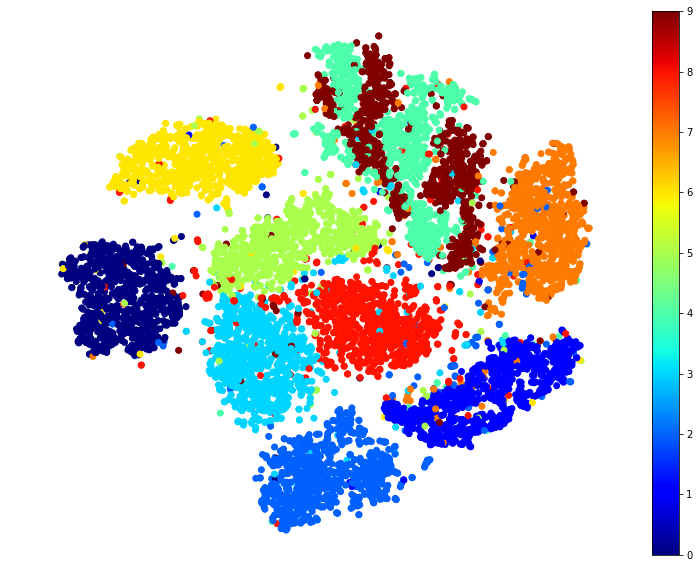

In [11]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()

Como resulta a visualização se utilizarmos outros algoritmos de ***dimensionality reduction***  como PCA, LLE, ou MDS? Alguma melhoria em tempo de execução?